In [3]:
import pandas as pd

In [4]:
!ls

01_accessibility  04_citycentre     09_participantprofile  survey-data.csv
01_centrum	  05_spendings	    ankieta.pdf		   Untitled.ipynb
02_geography	  06_big_festivals  datapackage.json	   venv
03_culture_zone   08_promo	    README.md


In [155]:
fm = pd.read_csv('survey-data.csv')
fm = fm.assign(id=pd.Series( range(1, len(fm) + 1) ))  # trudne - przydzielamy osobne ID do wiersza

In [156]:
fm[:5]

,event,event_detailed,date,place,admission,age,gender,address_postalcode,address_city,address_district,...,activity_accommodation,activity_sport,activity_sightseeing,activity_shopping,activity_none,activity_custom,activity_custom_value,spendings,participant_profile,id
0,Ars Independent,Ars Independent,2016-09-28,KMO Sala 211,0.0,20.0,M,NaN,Wrocław,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,100.0,NaN,1
1,Ars Independent,Ars Independent,2016-09-28,KMO Galeria 5,0.0,20.0,M,NaN,Piekary Śląskie,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.0,NaN,2
2,Ars Independent,Ars Independent,2016-09-29,Kino Światowid,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,Ars Independent,Ars Independent,2016-09-28,KMO Galeria 5,0.0,27.0,K,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,4
4,Ars Independent,Ars Independent,2016-09-28,Drzwi Zwane Koniem,0.0,19.0,K,NaN,Katowice,NaN,...,0.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,NaN,5


In [159]:
(
    fm
    .groupby('address_city')
    .count()[ ['id'] ]
    .sort_values('id', ascending=False)
)

,id
address_city,
Katowice,720
Warszawa,134
Sosnowiec,121
Kraków,106
Wrocław,93
Chorzów,82
Tychy,78
Bytom,65
Gliwice,65


In [160]:
kat = fm[fm.address_city == 'Katowice']  # wyciagamy tylko wyniki z Katowic
len(kat)

720

In [161]:
(
    kat
    .groupby(['event', 'gender'])
    .count()[ ['id'] ]
)

id
event                  gender    
Ars Independent        K       46
                       M       25
Inne wydarzenia        K       24
                       M        9
Intel Extreme Masters  K       16
                       M       17
Interpretacje          K       14
                       M        7
JazzArt Festival       K       28
                       M       11
Letni Ogród Teatralny  K       22
                       M        8
Muzeum Śląskie         K       58
                       M       20
NOSPR                  K       36
                       M       13
OFF Festival           K       11
                       M       14
Regiofun               K       29
                       M       16
Silesia Bazaar         K        9
                       M        7
Silesia Film           K       41
                       M       21
Silesian Jazz Festival K       20
                       M       13
Szyb Wilson            K       17
                       M       10
Tauron Nowa Muzyka     K       44
                       M       21
Teatr Śląski           K       38
                       M       24
Wystawy                K       18
                       M        9

In [162]:
import matplotlib
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43bbf40450>]],
      dtype=object)

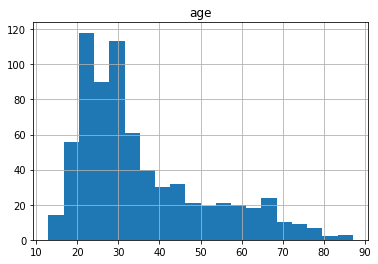

In [163]:
kat.hist(column='age', bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43bbeec4d0>,
      dtype=object)

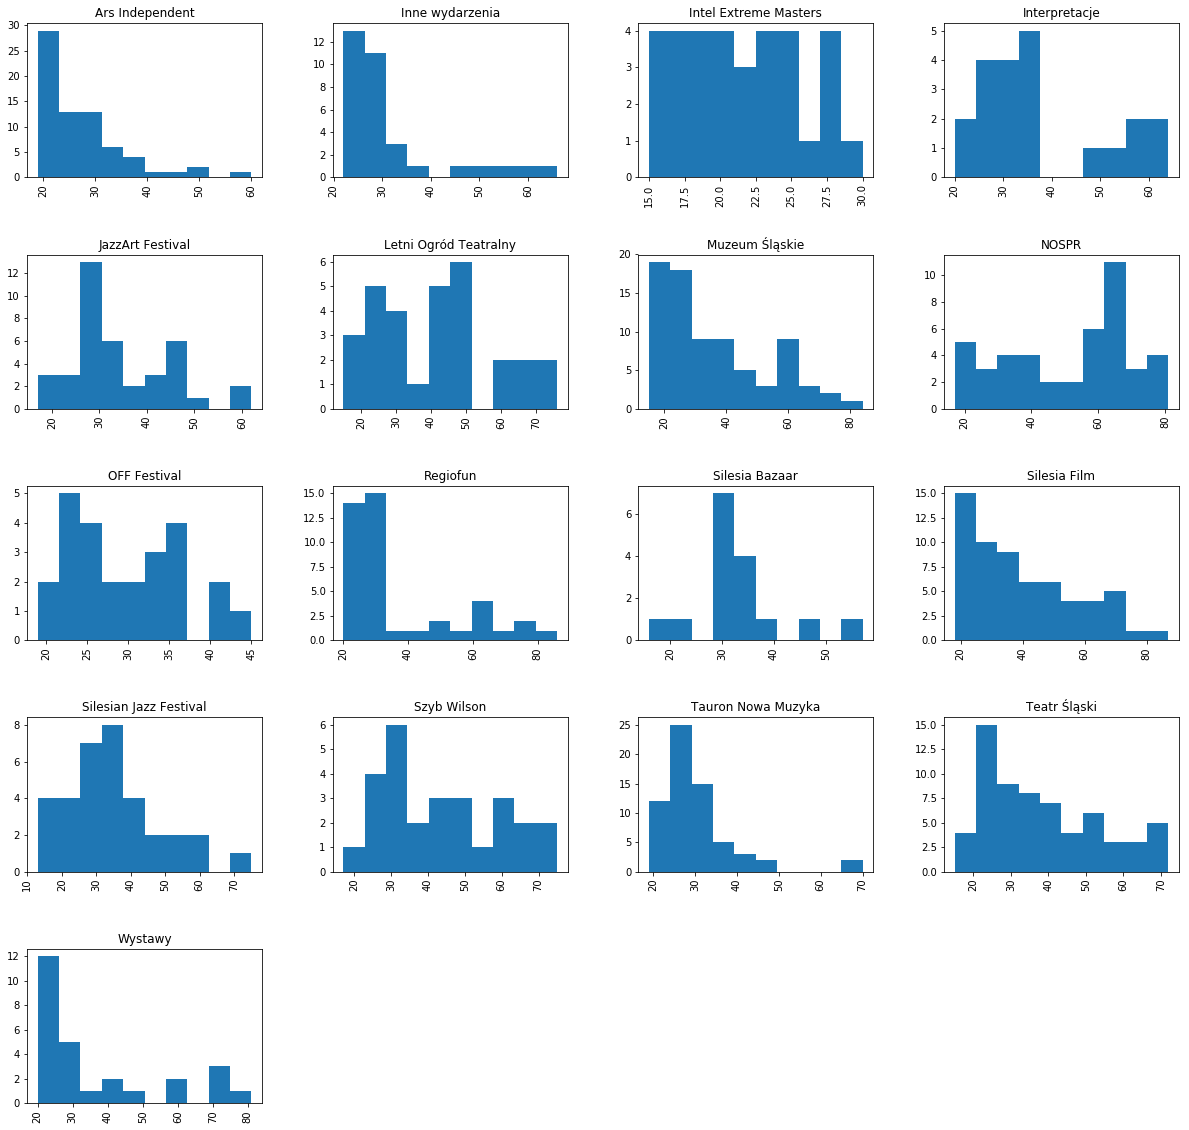

In [164]:
kat.hist(column='age', by='event', bins=10, figsize=(20, 20), xlabelsize=10, ylabelsize=10)

In [165]:
(
    kat
    .groupby('event')
    .sum()[[
        'facebook',
        'with_friends', 'with_children', 'with_alone',
        'with_partner', 'with_guests', 'with_custom',
    ]]
    .sort_values('facebook', ascending=False)
)

,facebook,with_friends,with_children,with_alone,with_partner,with_guests,with_custom
event,,,,,,,
Muzeum Śląskie,55.0,38.0,5.0,8.0,24.0,6.0,5.0
Tauron Nowa Muzyka,53.0,41.0,1.0,5.0,22.0,3.0,4.0
Teatr Śląski,41.0,29.0,5.0,2.0,32.0,1.0,7.0
Silesia Film,37.0,19.0,3.0,16.0,22.0,2.0,8.0
Regiofun,31.0,14.0,0.0,13.0,17.0,0.0,1.0
JazzArt Festival,30.0,13.0,2.0,8.0,18.0,0.0,1.0
Intel Extreme Masters,27.0,20.0,0.0,5.0,4.0,3.0,5.0
Inne wydarzenia,26.0,15.0,1.0,11.0,7.0,2.0,1.0
Ars Independent,23.0,41.0,2.0,16.0,26.0,2.0,2.0


In [166]:
(
    kat
    .groupby('event')
    .agg(['count', 'min', 'max', 'mean', 'sum'])
    [ [ 'spendings'] ]
)

spendings                                 
                           count  min     max        mean     sum
event                                                            
Ars Independent               58  0.0  1000.0   48.827586  2832.0
Inne wydarzenia               33  0.0    80.0   17.818182   588.0
Intel Extreme Masters         33  0.0  1580.0  193.424242  6383.0
Interpretacje                 16  0.0  1000.0  130.000000  2080.0
JazzArt Festival              38  0.0   150.0   41.473684  1576.0
Letni Ogród Teatralny         30  0.0  1000.0   63.400000  1902.0
Muzeum Śląskie                78  0.0   352.0   30.000000  2340.0
NOSPR                         48  0.0   500.0   43.750000  2100.0
OFF Festival                  25  0.0   500.0  201.600000  5040.0
Regiofun                      29  0.0   200.0   49.758621  1443.0
Silesia Bazaar                16  0.0   500.0  153.125000  2450.0
Silesia Film                  51  0.0   100.0   27.215686  1388.0
Silesian Jazz Festival        32  0.0  1000.0  110.312500  3530.0
Szyb Wilson                   27  0.0   200.0   33.333333   900.0
Tauron Nowa Muzyka            64  0.0  1000.0  140.515625  8993.0
Teatr Śląski                  43  0.0   200.0   48.813953  2099.0
Wystawy                       27  0.0    50.0   15.481481   418.0

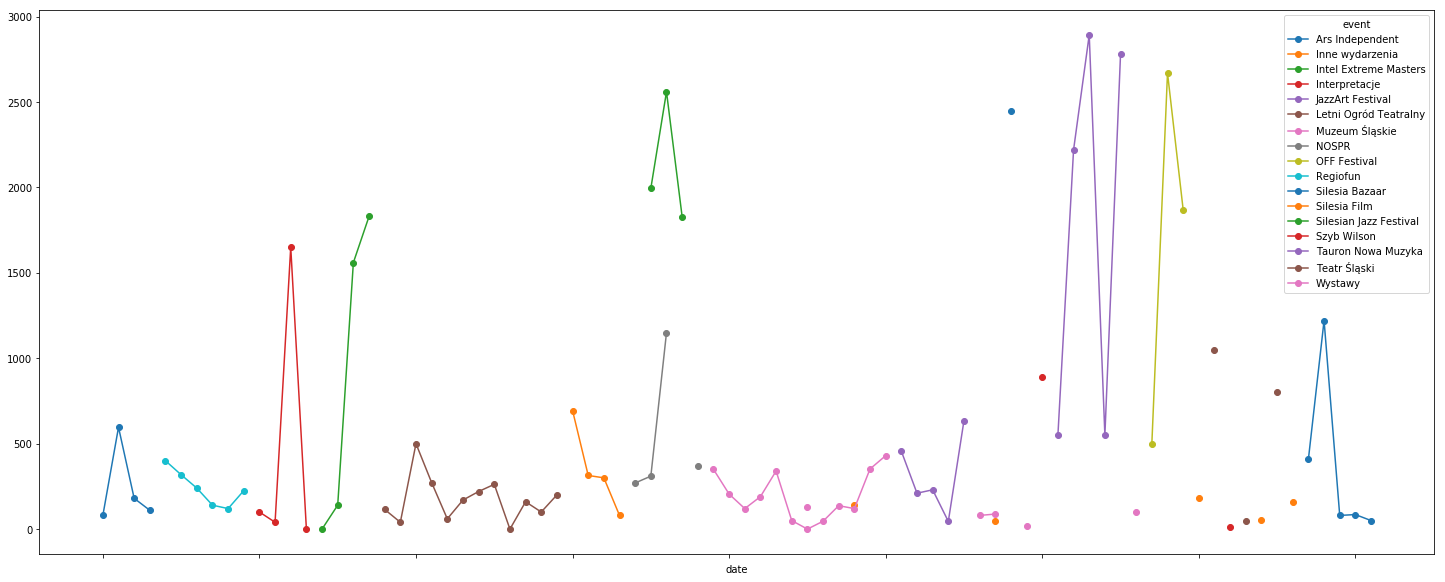

In [154]:
(
    kat
    .groupby(['date', 'event'])
    .sum()['spendings']
    .unstack()
    .plot(figsize=(25, 10), style='o-')
)